Классы:
0. Струнный
1. Клавишный
2. Духовой
3. Ударный
4. Смычковый
5. Язычковые

Признаки
0. Есть струны
1. Есть клавиши
2. Для игры надо дуть
3. Для игры нужен смычок
4. Для игры нужно электричество
5. Для игры надо бить
6. Звук извлекается не на прямую
7. Сделано из дерева
8. Инструмент держат в руках

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Суть работы

Создаём матрицу для коэффициентов:

In [75]:
arr = np.zeros((6, 9)) # классы, признаки
classes = [
    "струнный",
    "клавишный",
    "духовой",
    "ударный",
    "смычковый",
    "язычковые",
]
arr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Функции для обучения и тестирования:

In [76]:
def fit(X, labels):
    for x, label in zip(X, labels):
        for i in range(arr.shape[0]):
            if i == label:
                arr[i] += x
            else:
                arr[i] -= x

def test(X, labels):
    total = 0
    for x, label in zip(X, labels):
        res = np.argmax(x @ arr.T)
        total += label == res
        print("Ожидалось:", classes[label], "Получилось:", classes[res])
    print("Доля правильных предсказаний:", total/len(X))

Обучаем всем классам и тестируем:

In [77]:
X = np.array([
    [1, 0, 0, 0, 0, 0, 0, 1, 1], # струнный (например, деревянная гитара)
    [1, 0, 0, 1, 0, 0, 0, 1, 1], # смычковый
    [1, 1, 0, 0, 0, 0, 0, 1, 0], # клавишный
    [0, 0, 1, 0, 0, 0, 1, 0, 1], # язычковый
    [0, 0, 0, 0, 0, 1, 0, 0, 0], # ударный
    [0, 0, 1, 0, 0, 0, 0, 0, 1] # духовой
])
labels = [0, 4, 1, 5, 3, 2]
fit(X, labels)
print(arr)
test(X, labels)

[[-1. -1. -2. -1.  0. -1. -1. -1. -2.]
 [-1.  1. -2. -1.  0. -1. -1. -1. -4.]
 [-3. -1.  0. -1.  0. -1. -1. -3. -2.]
 [-3. -1. -2. -1.  0.  1. -1. -3. -4.]
 [-1. -1. -2.  1.  0. -1. -1. -1. -2.]
 [-3. -1.  0. -1.  0. -1.  1. -3. -2.]]
Ожидалось: струнный Получилось: струнный
Ожидалось: смычковый Получилось: смычковый
Ожидалось: клавишный Получилось: клавишный
Ожидалось: язычковые Получилось: язычковые
Ожидалось: ударный Получилось: ударный
Ожидалось: духовой Получилось: духовой
Доля правильных предсказаний: 1.0


Теперь предъявим абсолютно новый объект, но уже известного класса:

In [78]:
X = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 1] # гитара но металлическая
])
labels = [0]
print(arr)
test(X, labels)

[[-1. -1. -2. -1.  0. -1. -1. -1. -2.]
 [-1.  1. -2. -1.  0. -1. -1. -1. -4.]
 [-3. -1.  0. -1.  0. -1. -1. -3. -2.]
 [-3. -1. -2. -1.  0.  1. -1. -3. -4.]
 [-1. -1. -2.  1.  0. -1. -1. -1. -2.]
 [-3. -1.  0. -1.  0. -1.  1. -3. -2.]]
Ожидалось: струнный Получилось: струнный
Доля правильных предсказаний: 1.0


In [79]:
X = np.array([
    [0, 0, 0, 0, 1, 1, 0, 0, 0] # барабан, который требует электричества для игры
])
labels = [3]
print(arr)
test(X, labels)

[[-1. -1. -2. -1.  0. -1. -1. -1. -2.]
 [-1.  1. -2. -1.  0. -1. -1. -1. -4.]
 [-3. -1.  0. -1.  0. -1. -1. -3. -2.]
 [-3. -1. -2. -1.  0.  1. -1. -3. -4.]
 [-1. -1. -2.  1.  0. -1. -1. -1. -2.]
 [-3. -1.  0. -1.  0. -1.  1. -3. -2.]]
Ожидалось: ударный Получилось: ударный
Доля правильных предсказаний: 1.0


# Показ дообучения

In [80]:
X = np.array([
    [0, 0, 0, 0, 0, 1, 0, 0, 1] # переносной барабан
])
labels = [3]
print(arr)
test(X, labels)

[[-1. -1. -2. -1.  0. -1. -1. -1. -2.]
 [-1.  1. -2. -1.  0. -1. -1. -1. -4.]
 [-3. -1.  0. -1.  0. -1. -1. -3. -2.]
 [-3. -1. -2. -1.  0.  1. -1. -3. -4.]
 [-1. -1. -2.  1.  0. -1. -1. -1. -2.]
 [-3. -1.  0. -1.  0. -1.  1. -3. -2.]]
Ожидалось: ударный Получилось: струнный
Доля правильных предсказаний: 0.0


Неправильный результат, нужно дообучить модель:

In [81]:
fit(X, labels)
print(arr)
test(X, labels)

[[-1. -1. -2. -1.  0. -2. -1. -1. -3.]
 [-1.  1. -2. -1.  0. -2. -1. -1. -5.]
 [-3. -1.  0. -1.  0. -2. -1. -3. -3.]
 [-3. -1. -2. -1.  0.  2. -1. -3. -3.]
 [-1. -1. -2.  1.  0. -2. -1. -1. -3.]
 [-3. -1.  0. -1.  0. -2.  1. -3. -3.]]
Ожидалось: ударный Получилось: ударный
Доля правильных предсказаний: 1.0


Теперь проведём контрольную экспертизу по всем ранне предъявленным объектам, чтобы проверить, что коэффиценты не сбились.


In [82]:
X = np.array([
    [1, 0, 0, 0, 0, 0, 0, 1, 1], # струнный (например, деревянная гитара)
    [1, 0, 0, 1, 0, 0, 0, 1, 1], # смычковый
    [1, 1, 0, 0, 0, 0, 0, 1, 0], # клавишный
    [0, 0, 1, 0, 0, 0, 1, 0, 1], # язычковый
    [0, 0, 0, 0, 0, 1, 0, 0, 0], # ударный
    [0, 0, 1, 0, 0, 0, 0, 0, 1], # духовой
    [1, 0, 0, 0, 0, 0, 0, 0, 1], # гитара но металлическая
    [0, 0, 0, 0, 1, 1, 0, 0, 0], # барабан, который требует электричества для игры
    [0, 0, 0, 0, 0, 1, 0, 0, 1] # переносной барабан
])
labels = [0, 4, 1, 5, 3, 2, 0, 3, 3]
print(arr)
test(X, labels)

[[-1. -1. -2. -1.  0. -2. -1. -1. -3.]
 [-1.  1. -2. -1.  0. -2. -1. -1. -5.]
 [-3. -1.  0. -1.  0. -2. -1. -3. -3.]
 [-3. -1. -2. -1.  0.  2. -1. -3. -3.]
 [-1. -1. -2.  1.  0. -2. -1. -1. -3.]
 [-3. -1.  0. -1.  0. -2.  1. -3. -3.]]
Ожидалось: струнный Получилось: струнный
Ожидалось: смычковый Получилось: смычковый
Ожидалось: клавишный Получилось: клавишный
Ожидалось: язычковые Получилось: язычковые
Ожидалось: ударный Получилось: ударный
Ожидалось: духовой Получилось: духовой
Ожидалось: струнный Получилось: струнный
Ожидалось: ударный Получилось: ударный
Ожидалось: ударный Получилось: ударный
Доля правильных предсказаний: 1.0


Теперь модель доучена и определяет всё, чему обучали, правильно.

# Показ переобучения

Обучим модель ещё раз на одном примере из класса струнных:

In [73]:
X = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 1] # гитара но металлическая
])
labels = [0]
fit(X, labels)
print(arr)
test(X, labels)

[[ 0. -1. -2. -1.  0. -2. -1. -1. -2.]
 [-2.  1. -2. -1.  0. -2. -1. -1. -6.]
 [-4. -1.  0. -1.  0. -2. -1. -3. -4.]
 [-4. -1. -2. -1.  0.  2. -1. -3. -4.]
 [-2. -1. -2.  1.  0. -2. -1. -1. -4.]
 [-4. -1.  0. -1.  0. -2.  1. -3. -4.]]
Ожидалось: струнный Получилось: струнный
Доля правильных предсказаний: 1.0


После обучения снова контрольная экспертиза:

In [74]:
X = np.array([
    [1, 0, 0, 0, 0, 0, 0, 1, 1], # струнный (например, деревянная гитара)
    [1, 0, 0, 1, 0, 0, 0, 1, 1], # смычковый
    [1, 1, 0, 0, 0, 0, 0, 1, 0], # клавишный
    [0, 0, 1, 0, 0, 0, 1, 0, 1], # язычковый
    [0, 0, 0, 0, 0, 1, 0, 0, 0], # ударный
    [0, 0, 1, 0, 0, 0, 0, 0, 1], # духовой
    [1, 0, 0, 0, 0, 0, 0, 0, 1], # гитара но металлическая
    [0, 0, 0, 0, 1, 1, 0, 0, 0], # барабан, который требует электричества для игры
    [0, 0, 0, 0, 0, 1, 0, 0, 1] # переносной барабан
])
labels = [0, 4, 1, 5, 3, 2, 0, 3, 3]
print(arr)
test(X, labels)

[[ 0. -1. -2. -1.  0. -2. -1. -1. -2.]
 [-2.  1. -2. -1.  0. -2. -1. -1. -6.]
 [-4. -1.  0. -1.  0. -2. -1. -3. -4.]
 [-4. -1. -2. -1.  0.  2. -1. -3. -4.]
 [-2. -1. -2.  1.  0. -2. -1. -1. -4.]
 [-4. -1.  0. -1.  0. -2.  1. -3. -4.]]
Ожидалось: струнный Получилось: струнный
Ожидалось: смычковый Получилось: струнный
Ожидалось: клавишный Получилось: струнный
Ожидалось: язычковые Получилось: язычковые
Ожидалось: ударный Получилось: ударный
Ожидалось: духовой Получилось: струнный
Ожидалось: струнный Получилось: струнный
Ожидалось: ударный Получилось: ударный
Ожидалось: ударный Получилось: ударный
Доля правильных предсказаний: 0.6666666666666666


Система переобучилась и теперь больше склонна к струнным (коэффициенты сбились), надо переучивать!

## Визуализация

## Дальность между классами

Посмотрим, как далеко классы находятся друг от друга (модель взята с этапа дообучения)

In [83]:
q = []
for i, a in enumerate(arr):
    q.append([])
    for y, b in enumerate(arr):
        q[-1].append(sum(abs(a-b)))
        print(f"{sum(abs(a-b)):<2.0f}", end=' ')
    print()

0  4  6  8  2  8  
4  0  10 12 6  12 
6  10 0  6  8  2  
8  12 6  0  10 8  
2  6  8  10 0  10 
8  12 2  8  10 0  


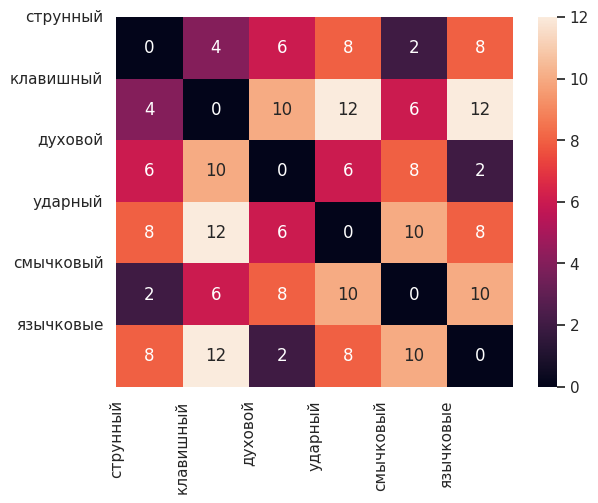

In [84]:
sns.heatmap(q, annot=True)
plt.xticks(range(len(classes)), classes, rotation='vertical')
plt.yticks(range(len(classes)), classes, rotation='horizontal');

## Линейные уравнения

Составим линейные уравнения для каждого класса, коэффциенты получаются из нашей матрицы

In [87]:
arr

array([[-1., -1., -2., -1.,  0., -2., -1., -1., -3.],
       [-1.,  1., -2., -1.,  0., -2., -1., -1., -5.],
       [-3., -1.,  0., -1.,  0., -2., -1., -3., -3.],
       [-3., -1., -2., -1.,  0.,  2., -1., -3., -3.],
       [-1., -1., -2.,  1.,  0., -2., -1., -1., -3.],
       [-3., -1.,  0., -1.,  0., -2.,  1., -3., -3.]])

In [88]:
for y, a in enumerate(arr):
    print(f"y{y}=",end ='')
    for i, elem in enumerate(a):
        print(f"{elem:+.0f}*x{i}", end='')
    print()

y0=-1*x0-1*x1-2*x2-1*x3+0*x4-2*x5-1*x6-1*x7-3*x8
y1=-1*x0+1*x1-2*x2-1*x3+0*x4-2*x5-1*x6-1*x7-5*x8
y2=-3*x0-1*x1+0*x2-1*x3+0*x4-2*x5-1*x6-3*x7-3*x8
y3=-3*x0-1*x1-2*x2-1*x3+0*x4+2*x5-1*x6-3*x7-3*x8
y4=-1*x0-1*x1-2*x2+1*x3+0*x4-2*x5-1*x6-1*x7-3*x8
y5=-3*x0-1*x1+0*x2-1*x3+0*x4-2*x5+1*x6-3*x7-3*x8


## График в линейном пространстве

 Точки будут представлять различные инструменты в пространстве, определенном параметрами c1 (есть струны) и c2 (нужно бить). Метки инструментов будут указаны рядом с соответствующими точками, что позволяет визуализировать отличия между инструментами в выбранных направлениях.

In [98]:
X = np.array([
    [1, 0, 0, 0, 0, 0, 0, 1, 1], # деревяная гитара
    [1, 0, 0, 1, 0, 0, 0, 1, 1], # смычковый инструмент
    [1, 1, 0, 0, 0, 0, 0, 1, 0], # клавишный инструмент
    [0, 0, 1, 0, 0, 0, 1, 0, 1], # язычковый инструмент
    [0, 0, 0, 0, 0, 1, 0, 0, 0], # ударный инструмент
    [0, 0, 1, 0, 0, 0, 0, 0, 1], # духовой инструмент
    [1, 0, 0, 0, 0, 0, 0, 0, 1], # металическая гитара
    [0, 0, 0, 0, 1, 1, 0, 0, 0], # барабан, который требует электричества для игры
    [0, 0, 0, 0, 0, 1, 0, 0, 1] # переносной барабан
])
label = ["деревянная гитара", "смычковый инструмент", "клавишный инструмент", "язычковый инструмент", "ударный инструмент", "духовой инструмент", "металическая гитара", "электрический барабан", "переносной барабан"]

1 0 деревянная гитара
1 0 смычковый инструмент
1 0 клавишный инструмент
0 1 ударный инструмент
1 0 металическая гитара
0 1 электрический барабан
0 1 переносной барабан


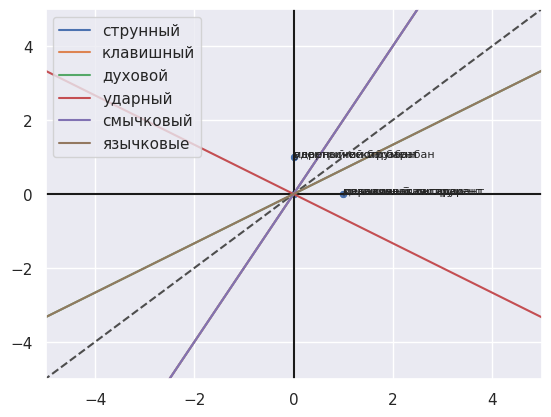

In [99]:
ax = np.linspace(-10, 10, 1000)
c1 = 0 #x
c2 = 5 #y

plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')
plt.plot(ax, ax, ls="--", c=".3")

max_=5
plt.xlim((-max_, max_))
plt.ylim((-max_, max_))
for i, a in enumerate(arr):
    plt.plot(ax * a[c1], ax*a[c2], label=classes[i])

x = []
y = []
for i, item in enumerate(X):
    x.append(item[c1])
    y.append(item[c2])
    if item[c1] != 0 or item[c2] != 0:
        print(item[c1], item[c2], label[i],)
        plt.text(item[c1], item[c2], label[i], fontsize=8)

sns.scatterplot(x=x, y=y)


plt.legend();